# Loading B-Rep Data with PythonOCC
 - OCCT(Open CASCADE Technology)은 다양한 CAD 데이터를 처리할 수 있음
 - OCCT(v7.9.0) 은 C++ 로 개발 됨. 라이선스 모델은 LPGL-2.1
 - CAD 데이터 IO 및 기하 연산, 시각화를 모두 제공함
 - 시각화는 OpenGL 기반으로 제공되고 있어서 노트북에서는 활용이 어려운 것 같음
 - pythonocc 는 OCCT의 래퍼이고, Qt 기반 OCCT 앱 만들기에 편리함

In [ ]:
import pyvista as pv

pv.set_jupyter_backend("static")

def show_pyvista_meshes(polydata_list):
    plotter = pv.Plotter()
    for pd in polydata_list:
        plotter.add_mesh(pd, color="lightgray", show_edges=True)
    plotter.show()

In [ ]:
from pvn.occ_utils import *
shape = load_brep("../../data/fixed.brep")

Face count: 2476


/var/folders/2n/sygb5rn93wb8t06pd18v3yxw0000gn/T/ipykernel_2801/3308301462.py:19: DeprecationWarning: Call to deprecated function breptools_Read since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method breptools.Read
  success = breptools_Read(shape, filepath, builder)


In [7]:
polydata_list = extract_faces_to_pyvista(shape)
polydata_list

[PolyData (0x11a735720)
   N Cells:    18
   N Points:   16
   N Strips:   0
   X Bounds:   -1.524e+01, -1.137e+01
   Y Bounds:   -6.296e+01, -6.250e+01
   Z Bounds:   3.803e+01, 4.085e+01
   N Arrays:   0,
 PolyData (0x30f93da80)
   N Cells:    10
   N Points:   10
   N Strips:   0
   X Bounds:   -2.607e+01, -2.359e+01
   Y Bounds:   -6.288e+01, -6.269e+01
   Z Bounds:   3.770e+01, 3.943e+01
   N Arrays:   0,
 PolyData (0x30f93e7a0)
   N Cells:    17
   N Points:   15
   N Strips:   0
   X Bounds:   -2.982e+01, -2.561e+01
   Y Bounds:   -6.364e+01, -6.307e+01
   Z Bounds:   5.152e+01, 5.540e+01
   N Arrays:   0,
 PolyData (0x30f93ed40)
   N Cells:    17
   N Points:   15
   N Strips:   0
   X Bounds:   -2.690e+01, -2.221e+01
   Y Bounds:   -6.357e+01, -6.308e+01
   Z Bounds:   5.437e+01, 5.731e+01
   N Arrays:   0,
 PolyData (0x30f93c280)
   N Cells:    18
   N Points:   16
   N Strips:   0
   X Bounds:   -1.881e+01, -1.479e+01
   Y Bounds:   -6.329e+01, -6.287e+01
   Z Bounds:   5.49

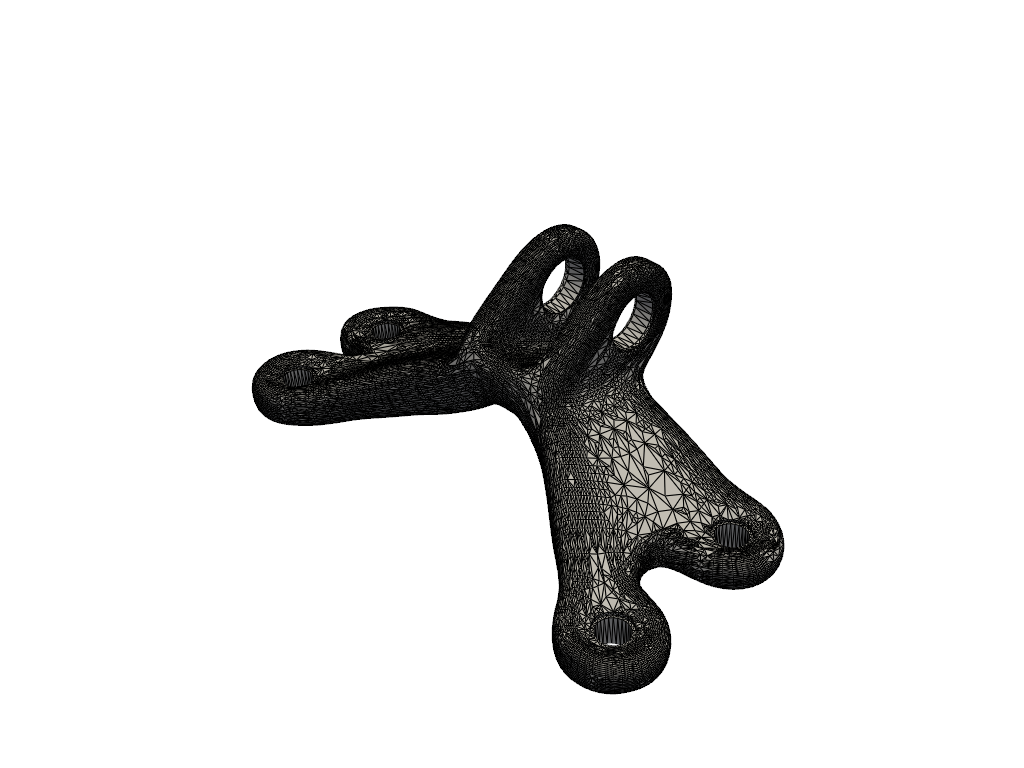

In [8]:
show_pyvista_meshes(polydata_list)